generated values for 1000 spacetime points
Time taken by evolve is 0.22100043296813965 seconds
[[[-0.6663643  -0.57356274]
  [-0.8034827  -0.5452539 ]
  [-0.9361409  -0.58125865]
  [-0.9620358  -0.577195  ]
  [-0.827797   -0.61197925]]

 [[-0.6663643  -0.57356274]
  [-0.7776967  -0.585871  ]
  [-0.7531301  -0.5821326 ]
  [-0.68541753 -0.52603036]
  [-0.7727603  -0.5097992 ]]

 [[-0.6663643  -0.57356274]
  [-0.6778063  -0.6501276 ]
  [-0.68158835 -0.63843936]
  [-0.7233254  -0.75294685]
  [-0.75522727 -0.77812874]]

 ...

 [[-0.50014913  0.46357876]
  [-0.38502723  0.41981274]
  [-0.322747    0.4570142 ]
  [-0.1969993   0.46728322]
  [-0.16968054  0.4747373 ]]

 [[-0.50014913  0.46357876]
  [-0.44462433  0.45126638]
  [-0.47449997  0.42782858]
  [-0.5504989   0.40452695]
  [-0.48991895  0.39708078]]

 [[-0.50014913  0.46357876]
  [-0.4131376   0.5097368 ]
  [-0.36716282  0.5343568 ]
  [-0.3523477   0.5670119 ]
  [-0.2856974   0.4281215 ]]]
tf.Tensor(
[[[1.1682    ]
  [1.0357264 ]
  [1.0

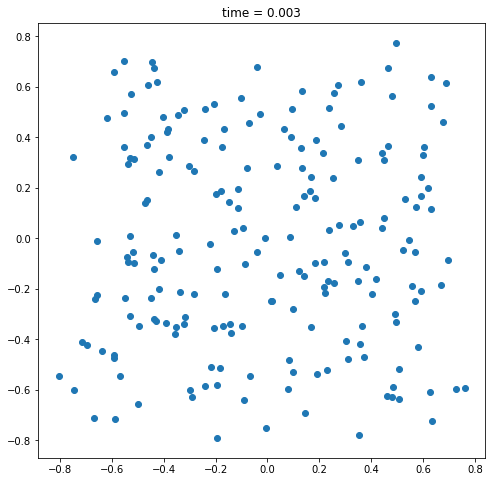

In [1]:
import os, sys
from pathlib import Path 
script_dir = Path(os.path.abspath(''))
module_dir = str(script_dir.parent.parent)
sys.path.insert(0, module_dir + '/modules')
sys.path.insert(0, module_dir + '/equations')

import tensorflow as tf 
import numpy as np 
from circle_bw import CircleBackward2D
import matplotlib.pyplot as plt 

sigma = np.sqrt(2.0)
two_pi = 2. * np.pi
def p0(x):
    return tf.exp(-0.5*tf.reduce_sum(tf.square(x), axis=-1, keepdims=True)) / two_pi
high = (1./1.42) * np.ones(2)
low = -high
eqn = CircleBackward2D(p0=p0, sigma=sigma, t1=0.01, low=low, high=high, folder='data')
x, y, _ = eqn.evolve(X0=200, n_repeats=3, time_steps=4)
print(x)
print(y)
print(tf.reduce_mean(tf.reduce_sum(x[:, -1, :]**2, axis=-1, keepdims=True)))

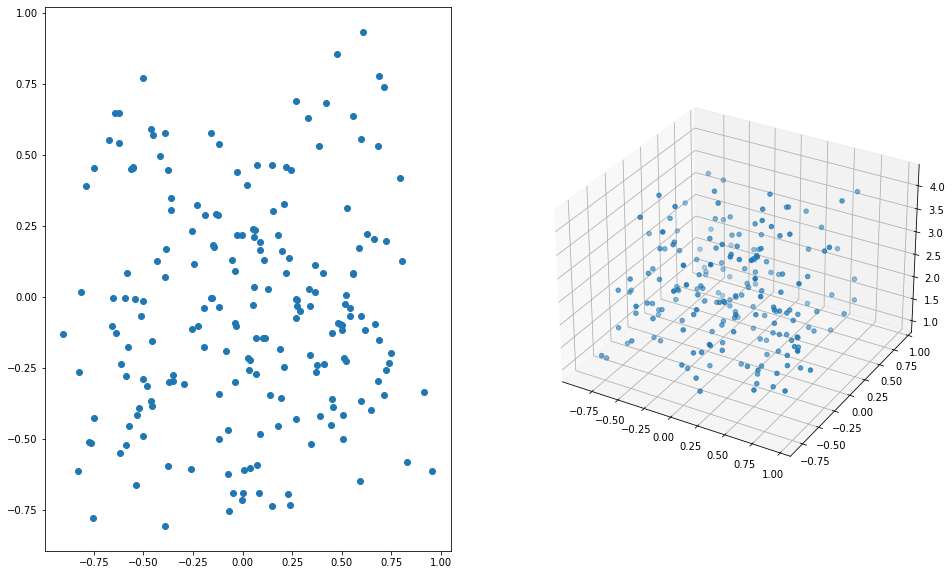

In [2]:
t, n_particles, n_repeats = 4, 200, 1
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
xl = [i*n_repeats for i in range(n_particles)]
yl = [i*n_repeats for i in range(n_particles)]
ax.scatter(np.take(x[:, t, 0], xl), np.take(x[:, t, 1], yl))
ax2.scatter3D(np.take(x[:, t, 0], xl), np.take(x[:, t, 1], yl), y[:, t].numpy().reshape(-1,))
#plt.scatter(x[:, 50, 0], x[:, 50, 1])

In [3]:
np.take(y[:, t], xl), np.argmax(np.take(y[:, t], xl)) 

(array([0.9954105 , 1.5774617 , 1.3269544 , 1.6974484 , 2.7707112 ,
        1.70263   , 4.024959  , 1.6246786 , 2.7975957 , 2.3728743 ,
        1.2553838 , 2.0756738 , 4.217234  , 1.8122668 , 3.4033163 ,
        3.2763984 , 3.17641   , 2.1754713 , 1.3507124 , 2.8390543 ,
        1.6071335 , 2.9749978 , 1.8402914 , 1.8185307 , 4.17708   ,
        3.224748  , 2.4772503 , 1.440576  , 3.5791092 , 3.7923315 ,
        2.861398  , 2.0157862 , 3.676711  , 1.6860958 , 1.3251386 ,
        2.656988  , 3.2952616 , 2.4286232 , 3.3190916 , 1.7628497 ,
        2.1513574 , 3.3615513 , 1.5814363 , 2.557254  , 2.3720868 ,
        0.97573453, 1.7642335 , 1.4434973 , 1.7580217 , 3.02093   ,
        1.6692662 , 1.5216093 , 3.9045334 , 2.7744443 , 1.6555376 ,
        2.8032858 , 4.040691  , 1.9214048 , 1.516347  , 2.309054  ,
        3.5130959 , 3.8582544 , 1.0674574 , 3.519029  , 3.983806  ,
        1.3192232 , 2.8204648 , 3.2159383 , 2.1701326 , 2.221287  ,
        1.3673111 , 3.0247662 , 3.1090536 , 3.33

In [4]:
s = x[9300:10300, t, :]
s

array([], shape=(0, 2), dtype=float32)

In [5]:
tf.reduce_mean(eqn.g(s))

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

In [6]:
eqn.p_inf(s[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
x

In [ ]:
eqn.p_inf([-0.08076239, -1.385004  ])

In [ ]:
tf.exp(-tf.square(tf.reduce_sum(tf.square(s[0])) - 1)/eqn.D)

In [ ]:
tf.exp(-20*0.8)

In [ ]:
x[96, 50, :]

In [ ]:
eqn.D

In [ ]:
y.shape

In [ ]:
xl

In [ ]:
x

In [ ]:
eqn.g(x)

In [ ]:
y

In [ ]:
(1.29+1.87+2.66)/3